In [1]:
import sys
import os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
%run ./two_layer_net.ipynb

In [2]:
# データセットの準備
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# モデルの構築
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# ハイパラメータの設定
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
iter_per_epoch = train_size / batch_size

# 出力結果の記録
train_acc_list = []
test_acc_list = []

In [3]:
def plot_graph():
    markers = {'train': 'o', 'test': 's'}
    x = np.arange(len(train_acc_list))
    plt.plot(x, train_acc_list, label='train acc')
    plt.plot(x, test_acc_list, label='test acc', linestyle='--')
    plt.xlabel("epochs")
    plt.ylabel("accuracy and loss")
    plt.ylim(0, 1.0)
    plt.legend(loc='lower right')
    plt.show()
    plt.savefig("results_train.png")

In [4]:
def train():
    for i in range(iters_num + 1):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        # grad = network.numerical_gradient(x_batch, t_batch)
        grad = network.gradient(x_batch, t_batch)

        for param in network.params.keys():
            network.params[param] -= learning_rate * grad[param]

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            test_acc = network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
            print("iteration: {:>5} | train acc: {:.5f}, test acc: {:.5f}".format(i, train_acc, test_acc))

In [5]:
train()

iteration:     0 | train acc: 0.09863, test acc: 0.09580
iteration:   600 | train acc: 0.79595, test acc: 0.80020
iteration:  1200 | train acc: 0.88043, test acc: 0.88460
iteration:  1800 | train acc: 0.89817, test acc: 0.90110
iteration:  2400 | train acc: 0.90813, test acc: 0.91110
iteration:  3000 | train acc: 0.91407, test acc: 0.91650
iteration:  3600 | train acc: 0.91955, test acc: 0.92190
iteration:  4200 | train acc: 0.92315, test acc: 0.92560
iteration:  4800 | train acc: 0.92717, test acc: 0.92880
iteration:  5400 | train acc: 0.93020, test acc: 0.93090
iteration:  6000 | train acc: 0.93342, test acc: 0.93320
iteration:  6600 | train acc: 0.93672, test acc: 0.93540
iteration:  7200 | train acc: 0.93892, test acc: 0.93760
iteration:  7800 | train acc: 0.94140, test acc: 0.93860
iteration:  8400 | train acc: 0.94342, test acc: 0.94160
iteration:  9000 | train acc: 0.94495, test acc: 0.94170
iteration:  9600 | train acc: 0.94752, test acc: 0.94530


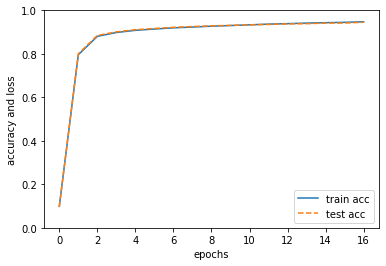

<Figure size 432x288 with 0 Axes>

In [11]:
plot_graph()

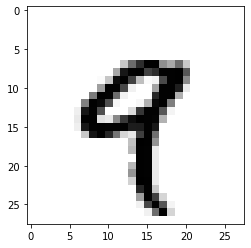

In [15]:
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()
img = x_train[4] / 255
plt.imshow(img, cmap=plt.cm.binary)
plt.show()